# Report on the Center's performance

The report is prepared in Jupyter Notebook, using Python.This means that all the manipulations with the data are shown in the cells and can be reproduced and applied to the similar dataset which can be of much bigger volume. The comments are provided after the small block of calculations and there are conclusions after each chapter. Top conclusions and recommendations are provided at the end of the notebook.

### Dataset

The provided dataset contains the data with KPIs of the 25 agents (with their tenure) for the perios of 3 months (July, August and September). The targets are indicated in brackets. 
Agent level KPIs include:
- QA transaction monitoring scorecard performance (86)
- Post interaction survey question scores for three questions:
- Q1: How satisfied are you with the overall customer service (5 pt scale, 5 highest/best rating) (85)
- Q2:  How satisfied are you with the last agent you dealt with? (5 pt scale, 5 highest/best rating) (86)
- Q3: Was your issue resolved? (1=Yes, 2= No) (75)
- Post interaction survey send rate (100)
- Calls handled (not provided)
- First contact resolution rate - number of customer contacts that are resolved on the first interaction with the customer (75)
- Average handle time (blended: 575)
- Trustpilot (customer review site) survey invitation rate (25)
- Trustpilot survey answer rate (25)
- Trustpilot scores of 5 and 4 stars (based on a 5 point star rating with 5 being the best rating) (25)

### Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df= pd.read_excel('QA Lead Business Case.xlsx')
df.head(5)

,Month,Center,Agent_Name,Tenure,QA_Score,CSAT_Q1,CSAT_Q2,CSAT_Q3,Survey_Sent_Rate,Calls_handled,Contact_Resolution,AHT,TP Invitation Rate,TP Answer Rate,% 5* Reviews
0,JUL,X,Agent_1,(4) 6 - 12 Months,0.85,0.68,0.87,0.67,0.89,424,0.50,600.02,0.14,0.12,0.86
1,AUG,X,Agent_1,(4) 6 - 12 Months,0.88,0.75,0.90,0.70,0.91,738,0.59,582.71,0.17,0.11,0.79
2,SEP,X,Agent_1,(4) 6 - 12 Months,0.87,0.79,0.92,0.79,0.89,270,0.57,537.44,0.07,0.11,0.93
3,JUL,X,Agent_2,(3) 3 - 6 Months,0.89,0.90,0.97,0.90,0.79,108,0.48,942.29,0.04,0.08,1.00
4,AUG,X,Agent_2,(3) 3 - 6 Months,0.90,0.90,0.92,0.78,0.78,657,0.48,748.49,0.04,0.08,1.00


In [ ]:
df[['QA_Score', 'CSAT_Q1','CSAT_Q2', 'CSAT_Q3', 'Survey_Sent_Rate', 'Contact_Resolution', 'TP Invitation Rate', 'TP Answer Rate',
       '% 5* Reviews']]=df[['QA_Score', 'CSAT_Q1','CSAT_Q2', 'CSAT_Q3', 'Survey_Sent_Rate', 'Contact_Resolution', 'TP Invitation Rate', 'TP Answer Rate',
       '% 5* Reviews']]*100

### General information on metrics: mean, standard deviation, minimum and maximum values, median

In [ ]:
df_describe=df.describe().T
df_describe
df_describe.insert(0,'target',[86,85,86,75,100,0,75,575,25,25,25])
df_describe.drop(['count'], axis=1) 

,target,mean,std,min,25%,50%,75%,max
QA_Score,86,86.56,6.23,69.00,83.00,87.00,90.00,100.00
CSAT_Q1,85,75.74,9.68,50.00,68.13,74.45,82.92,100.00
CSAT_Q2,86,88.19,5.51,74.32,83.93,87.64,92.00,100.00
CSAT_Q3,75,73.72,8.67,50.00,68.78,73.35,77.90,100.00
Survey_Sent_Rate,100,84.16,7.16,47.10,81.42,84.30,87.53,100.00
Calls_handled,0,433.73,236.52,16.00,264.50,443.00,637.50,807.00
Contact_Resolution,75,51.57,6.20,30.59,47.94,51.67,56.63,64.79
AHT,575,588.67,112.53,263.73,531.90,574.75,646.77,942.29
TP Invitation Rate,25,8.62,4.77,0.21,4.83,8.49,11.28,23.84
TP Answer Rate,25,6.58,6.76,0.47,2.26,4.83,8.89,50.00


The dataset does not not contain outlier values, mean is close to the median and distribution is close to normal.

## General results

In [ ]:
df_total_result=df_describe[['target', 'mean']]
df_total_result['against_target']=df_total_result['mean']-df_total_result['target']
df_total_result_graph=df_total_result[['target', 'mean']].reset_index()

In [ ]:
df_total_result

,target,mean,against_target
QA_Score,86,86.56,0.56
CSAT_Q1,85,75.74,-9.26
CSAT_Q2,86,88.19,2.19
CSAT_Q3,75,73.72,-1.28
Survey_Sent_Rate,100,84.16,-15.84
Calls_handled,0,433.73,433.73
Contact_Resolution,75,51.57,-23.43
AHT,575,588.67,13.67
TP Invitation Rate,25,8.62,-16.38
TP Answer Rate,25,6.58,-18.42


In [ ]:
def bold(series):
    highlight = 'font-weight: bold;'
    default = ''
    return [highlight for e in series]  

df_total_result_highlight = df_total_result.style.format('{:.2f}').apply(bold, axis=0, subset=['target']). background_gradient(
    subset=['against_target' ], cmap='Reds_r', vmax=0)
df_total_result_highlight

,target,mean,against_target
QA_Score,86.00,86.56,0.56
CSAT_Q1,85.00,75.74,-9.26
CSAT_Q2,86.00,88.19,2.19
CSAT_Q3,75.00,73.72,-1.28
Survey_Sent_Rate,100.00,84.16,-15.84
Calls_handled,0.00,433.73,433.73
Contact_Resolution,75.00,51.57,-23.43
AHT,575.00,588.67,13.67
TP Invitation Rate,25.00,8.62,-16.38
TP Answer Rate,25.00,6.58,-18.42


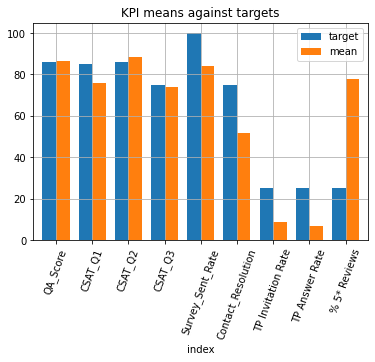

In [ ]:
df_total_result_graph.drop([5,7]).plot.bar(grid=True, title="KPI means against targets", x='index', rot=70, width = 0.75, );

### Conclusions:

##### Below target
- CSAT_Q1 - general satisfaction with the service (reasons - escalations, waiting time, previous specialist, experience
- CSAT_Q3 - resolution - in more than 26% cases the issue was not resolved for the user. Users should feel their issue is resolved after the case is closed, however the survey is sent after each contact. So it is related to Contact_Resolution KPI (lower one, lower the other).
- Survey_Sent_Rate - under CX control, should be monitored. Issues to check - any IT issue?
- Contact_Resolution - number of customer contacts that are resolved on the first interaction with the customer. Crucial. Efficiency. Callbacks? Is it related to knowledge or some procedures? Proactivity, anticipation, full and correct information, education.
- TP Invitation Rate - is low, CX many need a guidance on this, difficult to calculate, they may wait for the best case too much time, may need to be coached on the autoevaluation
- TP Answer Rate is low, mostly outside of our control, we need to check what instruments we have to improve it - emails reminders or the form of invitation should be more personal.


##### Above target
- QA_Score, but of course can be better
- CSAT_Q2 - really good result, means that CX are doing great job as it reflects their personal impact, CX needed to be encouraged
- % 5* Reviews really well done (tenured agent seem to know better how to make it)

Other*
- Calls_handled - needed to be regarded in context of productive time
- AHT - used blended average as no data available on Level1 and Level2, average is 13.67 is more than target

## Performance by month

In [ ]:
df['Month'] = df['Month'].map({'JUL': '07_JUL', 'AUG': '08_AUG', 'SEP': '09_SEP'})

In [ ]:
df_month = df.groupby(['Month']).agg({'QA_Score': 'mean', 'CSAT_Q1': 'mean',
       'CSAT_Q2': 'mean', 'CSAT_Q3': 'mean', 'Survey_Sent_Rate': 'mean', 'Calls_handled': 'mean',
       'Contact_Resolution': 'mean', 'AHT': 'mean', 'TP Invitation Rate': 'mean', 'TP Answer Rate': 'mean',
       '% 5* Reviews': 'mean'})

In [ ]:
df_month

,QA_Score,CSAT_Q1,CSAT_Q2,CSAT_Q3,Survey_Sent_Rate,Calls_handled,Contact_Resolution,AHT,TP Invitation Rate,TP Answer Rate,% 5* Reviews
Month,,,,,,,,,,,
07_JUL,86.20,72.86,87.49,73.38,82.81,398.64,47.66,610.89,7.91,8.08,72.75
08_AUG,86.28,75.24,88.33,73.61,84.39,508.84,52.63,598.47,9.80,6.18,83.05
09_SEP,87.20,79.12,88.76,74.17,85.29,393.72,54.42,556.64,8.14,5.53,78.01


In [ ]:
df_month.style.background_gradient(
    subset=['QA_Score', 'CSAT_Q2' ], cmap='Greens').background_gradient(
    subset=['CSAT_Q1' ], cmap='Reds_r', vmax=85).background_gradient(
    subset=['CSAT_Q3', 'Contact_Resolution' ], cmap='Reds_r', vmax=75).background_gradient(
    subset=['Survey_Sent_Rate'], cmap='Reds_r',vmax=100).background_gradient(
    subset=['AHT'], cmap='Reds',vmin=575).background_gradient(
    subset=['Calls_handled'], cmap='Oranges_r').background_gradient(
    subset=['TP Invitation Rate', 'TP Answer Rate'], cmap='Oranges_r', vmax=25).background_gradient(
    subset=['% 5* Reviews'], cmap='Greens').format('{:.2f}')

,QA_Score,CSAT_Q1,CSAT_Q2,CSAT_Q3,Survey_Sent_Rate,Calls_handled,Contact_Resolution,AHT,TP Invitation Rate,TP Answer Rate,% 5* Reviews
Month,,,,,,,,,,,
07_JUL,86.20,72.86,87.49,73.38,82.81,398.64,47.66,610.89,7.91,8.08,72.75
08_AUG,86.28,75.24,88.33,73.61,84.39,508.84,52.63,598.47,9.80,6.18,83.05
09_SEP,87.20,79.12,88.76,74.17,85.29,393.72,54.42,556.64,8.14,5.53,78.01


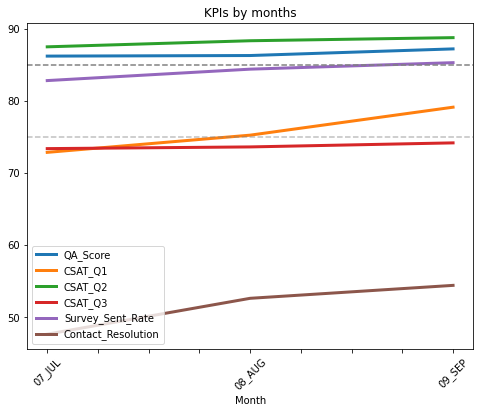

In [ ]:
df_month_graph=df_month.drop(
    ['AHT', 'Calls_handled', 'TP Invitation Rate', 'TP Answer Rate', '% 5* Reviews' ], axis=1).plot(
    linewidth = 3, rot=45, figsize=(8, 6), title="KPIs by months")
df_month_graph.axhline(75, color='grey', linestyle='--', alpha=0.5)
df_month_graph.axhline(85, color='grey', linestyle='--');

Overall slight improvement of KPIs within 3 months, especially for CSAT_Q1 and Contact Resolution.

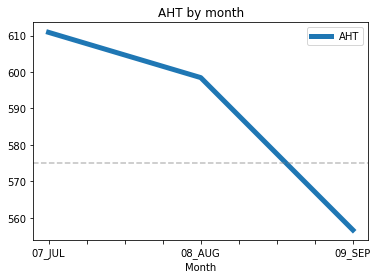

In [ ]:
df_month['AHT'].plot(linewidth = 5, legend=True, title="AHT by month").axhline(575, color='grey', linestyle='--', alpha=0.5);

AHT is decreasing progressively

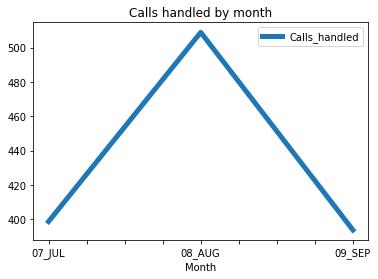

In [ ]:
df_month['Calls_handled'].plot(linewidth = 5, title="Calls handled by month").legend();

Calls handled had the peak in August and dropped in September to July's level.

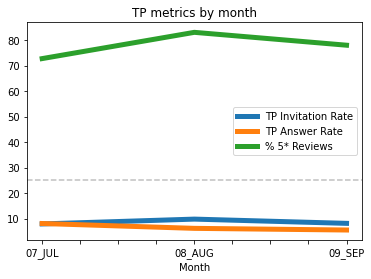

In [ ]:
df_month[['TP Invitation Rate', 'TP Answer Rate', '% 5* Reviews']].plot(
    linewidth = 5, title="TP metrics by month").axhline(25, color='grey', linestyle='--', alpha=0.5);

TP metrics have not varied a lot within these months.

### Conclusions:
- Overall monthly dynamics shows slight improvements and increse from july to september.
- Despite this improvement, for CSAT_Q1, CSAT_Q3, Survey_Sent_Rate, and Contact_Resolution, this last month's targets were still not met.
- AHT has decreased 54sec during the period and the target is met in September.
- Calls handled had it peak in August and in September had dropped to the July level
- TP Invitation and answer rate are far below target during all the period, however % 5* Reviews are above target.


## Performance by tenure

### Tenure distribution among agents

In [ ]:
# headcount by tenure by month, raw numbers
tenure_cross_raw=pd.crosstab(df['Tenure'], df['Month'])
tenure_cross_raw.style.background_gradient(
    cmap='Oranges')

Month,07_JUL,08_AUG,09_SEP
Tenure,,,
(0) 0 - 15 Days (OJT),1,0,0
(1) 15 - 45 Days,2,1,0
(2) 45 - 90 Days,3,2,1
(3) 3 - 6 Months,13,8,7
(4) 6 - 12 Months,3,11,13
(5) 12 - 18 Months,1,1,1
(6) >18 Months,2,2,3


In [ ]:
tenure_cross_raw

Month,07_JUL,08_AUG,09_SEP
Tenure,,,
(0) 0 - 15 Days (OJT),1,0,0
(1) 15 - 45 Days,2,1,0
(2) 45 - 90 Days,3,2,1
(3) 3 - 6 Months,13,8,7
(4) 6 - 12 Months,3,11,13
(5) 12 - 18 Months,1,1,1
(6) >18 Months,2,2,3


### % Tenure distribution among agents

In [ ]:
# headcount by tenure by month, %
tenure_cross=pd.crosstab(df['Tenure'], df['Month'])
tenure_cross=tenure_cross.div(tenure_cross.sum(axis=0), axis=1)*100
tenure_cross.style.background_gradient(
    cmap='Oranges').format('{:.0f}')

Month,07_JUL,08_AUG,09_SEP
Tenure,,,
(0) 0 - 15 Days (OJT),4,0,0
(1) 15 - 45 Days,8,4,0
(2) 45 - 90 Days,12,8,4
(3) 3 - 6 Months,52,32,28
(4) 6 - 12 Months,12,44,52
(5) 12 - 18 Months,4,4,4
(6) >18 Months,8,8,12


In [ ]:
tenure_cross

Month,07_JUL,08_AUG,09_SEP
Tenure,,,
(0) 0 - 15 Days (OJT),4.00,0.00,0.00
(1) 15 - 45 Days,8.00,4.00,0.00
(2) 45 - 90 Days,12.00,8.00,4.00
(3) 3 - 6 Months,52.00,32.00,28.00
(4) 6 - 12 Months,12.00,44.00,52.00
(5) 12 - 18 Months,4.00,4.00,4.00
(6) >18 Months,8.00,8.00,12.00


The vast majority of agents were between 3 and 6 month in July and between 6 and 12 month in August and September.
Only one agent of tenure 0 - 15 Days in July, one agent of 12 - 18 Months and 3 agents of tenure  >18 Months in September.

### Overall performance by tenure

In [ ]:
df_tenure = df.groupby(['Tenure']).agg({'QA_Score': 'mean', 'CSAT_Q1': 'mean',
       'CSAT_Q2': 'mean', 'CSAT_Q3': 'mean', 'Survey_Sent_Rate': 'mean', 'Calls_handled': 'mean',
       'Contact_Resolution': 'mean', 'AHT': 'mean', 'TP Invitation Rate': 'mean', 'TP Answer Rate': 'mean',
       '% 5* Reviews': 'mean'})
df_tenure.style.background_gradient(
    subset=['QA_Score', 'CSAT_Q2' ], cmap='Reds_r', vmax=86).background_gradient(
    subset=['CSAT_Q1' ], cmap='Reds_r', vmax=85).background_gradient(
    subset=['CSAT_Q3', 'Contact_Resolution' ], cmap='Reds_r', vmax=75).background_gradient(
    subset=['Survey_Sent_Rate'], cmap='Reds_r',vmax=100).background_gradient(
    subset=['AHT'], cmap='Reds',vmin=575).background_gradient(
    subset=['Calls_handled'], cmap='Oranges_r').background_gradient(
    subset=['TP Invitation Rate', 'TP Answer Rate'], cmap='Oranges_r', vmax=25).background_gradient(
    subset=['% 5* Reviews'], cmap='Greens').format('{:.2f}')

,QA_Score,CSAT_Q1,CSAT_Q2,CSAT_Q3,Survey_Sent_Rate,Calls_handled,Contact_Resolution,AHT,TP Invitation Rate,TP Answer Rate,% 5* Reviews
Tenure,,,,,,,,,,,
(0) 0 - 15 Days (OJT),70.00,72.97,74.32,64.10,47.10,259.00,37.69,523.84,1.44,3.57,nan
(1) 15 - 45 Days,90.33,81.36,88.18,73.18,80.42,377.00,46.57,552.08,11.38,2.46,52.50
(2) 45 - 90 Days,84.67,77.67,87.71,74.01,85.15,355.50,50.55,576.34,9.49,6.27,81.25
(3) 3 - 6 Months,88.46,76.59,89.52,74.60,84.45,403.57,50.15,622.28,7.42,5.96,75.72
(4) 6 - 12 Months,84.85,73.48,87.91,74.19,85.29,484.26,55.19,578.11,9.81,5.87,76.22
(5) 12 - 18 Months,87.33,83.75,90.54,69.43,87.86,248.33,45.41,420.05,6.51,7.72,87.50
(6) >18 Months,87.57,73.93,85.38,71.57,83.14,555.29,50.89,602.68,8.82,12.83,94.29


In [ ]:
df_tenure

,QA_Score,CSAT_Q1,CSAT_Q2,CSAT_Q3,Survey_Sent_Rate,Calls_handled,Contact_Resolution,AHT,TP Invitation Rate,TP Answer Rate,% 5* Reviews
Tenure,,,,,,,,,,,
(0) 0 - 15 Days (OJT),70.00,72.97,74.32,64.10,47.10,259.00,37.69,523.84,1.44,3.57,NaN
(1) 15 - 45 Days,90.33,81.36,88.18,73.18,80.42,377.00,46.57,552.08,11.38,2.46,52.50
(2) 45 - 90 Days,84.67,77.67,87.71,74.01,85.15,355.50,50.55,576.34,9.49,6.27,81.25
(3) 3 - 6 Months,88.46,76.59,89.52,74.60,84.45,403.57,50.15,622.28,7.42,5.96,75.72
(4) 6 - 12 Months,84.85,73.48,87.91,74.19,85.29,484.26,55.19,578.11,9.81,5.87,76.22
(5) 12 - 18 Months,87.33,83.75,90.54,69.43,87.86,248.33,45.41,420.05,6.51,7.72,87.50
(6) >18 Months,87.57,73.93,85.38,71.57,83.14,555.29,50.89,602.68,8.82,12.83,94.29


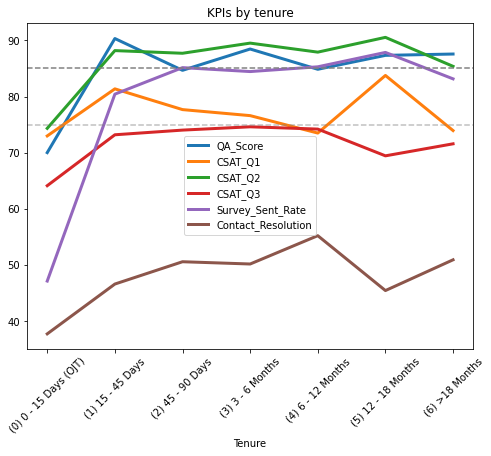

In [ ]:
df_tenure_graph=df_tenure.drop(
    ['AHT', 'Calls_handled', 'TP Invitation Rate', 'TP Answer Rate', '% 5* Reviews' ], axis=1).plot(
    linewidth = 3, rot=45, figsize=(8, 6), title="KPIs by tenure")
df_tenure_graph.axhline(75, color='grey', linestyle='--', alpha=0.5)
df_tenure_graph.axhline(85, color='grey', linestyle='--');

The lowest performance is shown by the least tenured, then agents show improvements and have generally stable performance near the targets for most KPIs (contact resolution is generally much below target). With more tenure, the survey sent rate is higher. After 18 month there is a decrease in KPIs which may indicate a lack of motivation. Most tenured agents should be monitored and motivated, they should not be skipped in terms of coachings and feedback sessions. The resolution rate and Contact resolution decreases earlier, after 1 year tenure. The resolution workflow should be addressed in general and for most tenured agents especially.

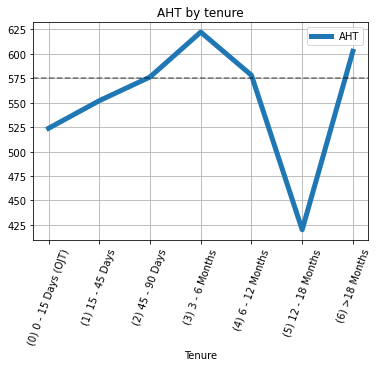

In [ ]:
df_tenure['AHT'].plot(linewidth = 5, legend=True, title="AHT by tenure", rot=70, grid=True).axhline(575, color='black', linestyle='--', alpha=0.5);

AHT starts to decrease after 6 months tenure. With more experience agents are more efficient on the phone, however for the most tenured agents experiences a huge increase of AHT. They need special attention and should be monitored on AHT. *However, this may be partially caused because of a small sample.

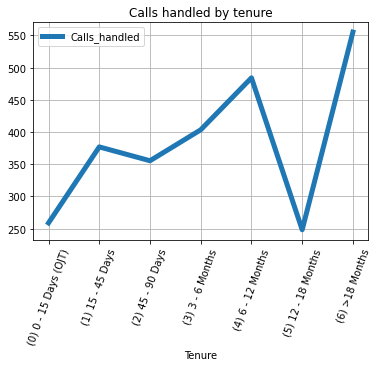

In [ ]:
df_tenure['Calls_handled'].plot(linewidth = 5, legend=True, title="Calls handled by tenure", rot=70, grid=True);

Number of calls handled increases with the tenure, but drops abruptly for the 12-18 months bucket. This should be paid attention. It should be noted, that there is no data on productive time, so, for example, a lot of agents from this bucket had holidays during summer months, this could have impacted on the low average number of handled calls.

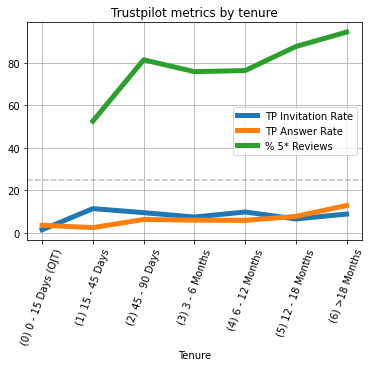

In [ ]:
df_tenure[['TP Invitation Rate', 'TP Answer Rate', '% 5* Reviews']].plot(
    linewidth = 5, title="Trustpilot metrics by tenure", rot=70, grid=True).axhline(25, color='grey', linestyle='--', alpha=0.5);

The Trustpilot invitation rate is low and not varying a lot with the tenure. Nevertheless, the most tenured agents seem to know better which cases would have 5 star reviews in Trustpilot. With a similar invitation rate, they have a higher percentage of 4-5 stars reviews. This knowledge should be shared with less experienced colleagues.

### Conclusion:
- General dynamic is that performance is increasing once agents start to have more experience
- Most tenured agents show decrease in most KPIs, especially for the resolution  metrics
- Most tenured agents should be paid special attention
- Number of calls seems to drop abruptly for the 12-18 months bucket, this should be monitored with more information on productive time
- Most experienced agents have higher percentage on 5 star reviews in Trustpilot and may provide some tips on picking the cases

## Performance by agents

In [ ]:
df['Tenure_int'] = df['Tenure'].map({'(0) 0 - 15 Days (OJT)': 0, '(1) 15 - 45 Days': 1, '(2) 45 - 90 Days': 2, '(3) 3 - 6 Months':3 , '(4) 6 - 12 Months' : 4, '(5) 12 - 18 Months' : 5, '(6) >18 Months':6})

In [ ]:
df_agents = df.groupby(['Agent_Name']).agg({'Tenure_int': 'max', 'QA_Score': 'mean', 'CSAT_Q1': 'mean',
       'CSAT_Q2': 'mean', 'CSAT_Q3': 'mean', 'Survey_Sent_Rate': 'mean', 'Calls_handled': 'mean',
       'Contact_Resolution': 'mean', 'AHT': 'mean', 'TP Invitation Rate': 'mean', 'TP Answer Rate': 'mean',
       '% 5* Reviews': 'mean'}).sort_values(by=['QA_Score','CSAT_Q1', 'CSAT_Q2', 'CSAT_Q3', 'Survey_Sent_Rate', 'Contact_Resolution', 'AHT'])

In [ ]:
df_agents

,Tenure_int,QA_Score,CSAT_Q1,CSAT_Q2,CSAT_Q3,Survey_Sent_Rate,Calls_handled,Contact_Resolution,AHT,TP Invitation Rate,TP Answer Rate,% 5* Reviews
Agent_Name,,,,,,,,,,,,
Agent_7,4,76.67,71.13,90.64,69.92,84.94,485.67,51.91,564.60,10.35,1.33,72.22
Agent_6,4,78.33,66.98,83.96,72.82,85.38,667.67,53.68,506.29,10.57,1.68,55.56
Agent_5,2,79.00,77.40,79.46,69.90,63.22,442.67,43.32,519.98,4.08,2.69,100.00
Agent_23,5,82.33,65.63,82.26,65.69,84.81,644.00,58.67,689.95,7.72,7.93,86.51
Agent_15,4,83.67,82.27,88.71,70.56,80.04,519.00,53.80,564.63,2.54,1.20,100.00
Agent_16,4,84.00,72.67,95.22,74.35,82.93,421.00,50.52,724.81,9.52,4.89,61.11
Agent_10,3,84.33,65.01,84.00,73.31,89.12,629.67,53.20,557.18,8.71,11.69,78.71
Agent_18,4,85.00,70.30,84.56,79.47,81.28,520.67,56.77,497.89,14.27,1.22,30.95
Agent_8,6,85.00,72.58,84.12,74.72,83.86,671.33,49.53,651.27,13.13,7.05,86.67


In [ ]:
df_agents_gradient = df_agents.style.background_gradient(
    subset=['QA_Score', 'CSAT_Q2' ], cmap='Reds_r', vmax=86).background_gradient(
    subset=['CSAT_Q1' ], cmap='Reds_r', vmax=85).background_gradient(
    subset=['CSAT_Q3', 'Contact_Resolution' ], cmap='Reds_r', vmax=75).background_gradient(
    subset=['Survey_Sent_Rate'], cmap='Reds_r',vmax=100).background_gradient(
    subset=['AHT'], cmap='Reds',vmin=575).background_gradient(
    subset=['Calls_handled'], cmap='Oranges_r').background_gradient(
    subset=['TP Invitation Rate', 'TP Answer Rate'], cmap='Oranges_r', vmax=25).background_gradient(
    subset=['% 5* Reviews'], cmap='Greens').format('{:.2f}')
df_agents_gradient

,Tenure_int,QA_Score,CSAT_Q1,CSAT_Q2,CSAT_Q3,Survey_Sent_Rate,Calls_handled,Contact_Resolution,AHT,TP Invitation Rate,TP Answer Rate,% 5* Reviews
Agent_Name,,,,,,,,,,,,
Agent_7,4.00,76.67,71.13,90.64,69.92,84.94,485.67,51.91,564.60,10.35,1.33,72.22
Agent_6,4.00,78.33,66.98,83.96,72.82,85.38,667.67,53.68,506.29,10.57,1.68,55.56
Agent_5,2.00,79.00,77.40,79.46,69.90,63.22,442.67,43.32,519.98,4.08,2.69,100.00
Agent_23,5.00,82.33,65.63,82.26,65.69,84.81,644.00,58.67,689.95,7.72,7.93,86.51
Agent_15,4.00,83.67,82.27,88.71,70.56,80.04,519.00,53.80,564.63,2.54,1.20,100.00
Agent_16,4.00,84.00,72.67,95.22,74.35,82.93,421.00,50.52,724.81,9.52,4.89,61.11
Agent_10,3.00,84.33,65.01,84.00,73.31,89.12,629.67,53.20,557.18,8.71,11.69,78.71
Agent_18,4.00,85.00,70.30,84.56,79.47,81.28,520.67,56.77,497.89,14.27,1.22,30.95
Agent_8,6.00,85.00,72.58,84.12,74.72,83.86,671.33,49.53,651.27,13.13,7.05,86.67


### Conclusions:

Outliers: 
- By QA score and QSAT: Agent_5 (special attention because of very low Contact Resolution and Survey_Sent_Rate), Agent_7, Agent_6, 
- By AHT: Agent_2, Agent_16, Agent_22 (very low Contact Resolution)
- Very low calls handled: Agent_13 (very low Contact Resolution and CSAT_Q3), Agent_22, Agent_25

Outliers should be addressed and coached in order to improve their performance. Depending on the case, a Plan of Improvement can be designed and implemented.

Good performers: 
- Agent_21, Agent_20 (however, their resolution rate is not very high) Good performers should receive positive feedback which is important for motivation. Some encouraging acts can be implemented (recognition, perks, 'QA Master').They also can be POC or Floor supporters depending on business needs.

## Additional : insights from correlations between metrics

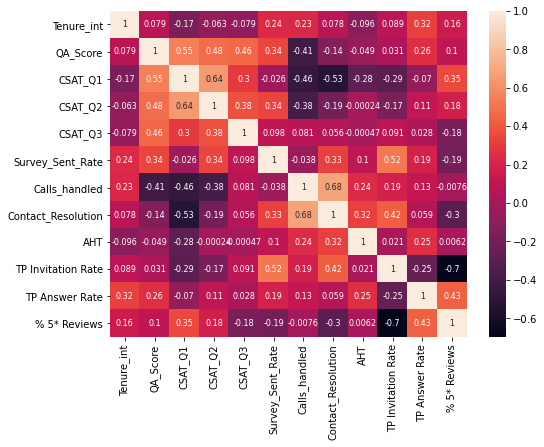

In [ ]:
cm2 = df_agents.corr() 

plt.figure(figsize=(8,6))  
sns.heatmap(cm2, annot = True, annot_kws = {'size':8});

This correlation matrix shows the relation between metrics and may provide some insights. The more absolute value is to 1, the stronger is the relationship. We will comment the correlations with absolute values more than 0.3, which can be significant.

#### Insights:

- QA Score is related to CSAT metrics and Survey Sent rate. There is a negative correlation between QA score and calls handled - more calls, lower the score (similar for CSAT_Q1, CSAT_Q2 and calls handled). This means that extremely quick agents can reduce the quality. We have to remember about the balance and that quantity does not always mean quality.
- CSAT_Q1 and CSAT_Q2 have strong correlation between them, with CSAT_Q3 is less. Overall satisfaction is strongly related with the satisfactions from the agent's work. However, excellent service and agent's attention do not always lead to the desirable outcome for the customer and their sense of the question resolved. This may be related to the product and policies.
- CSAT_Q1 is strongly negatively related to the Contact resolution. This may mean that when there are too many cases resolved on the first interaction, the satisfaction with the service is lower, and some cases could have been resolved prematurely and closed without the full resolution. Agents should be sure that the issue was fully addressed after the first interaction, check if the information was full, the questions were anticipated and education was provided.
- Survey sent rate is related with the TP Invitation rate, so working towards the increase of the survey sent rate, which should be 100% should lead to the increase of TP Invitation rate. If the first is always mandatory, the last needs the guidance from the leadership in order to choose the best cases for TP invitations.
- Calls handled are related to the contact resolution: more calls are handled, more resolutions are made from the first interaction, and more resolutions are made, more calls can be attended. Contact resolution is also related to the AHT and TP invitation rate. It may suggest that agents who are more productive in terms of quick resolutions handle more calls, have less AHT, send more survey invitations, but can be worse performers in terms of quality and overall satisfaction of the customer.
- Trustpilot scores of 5 and 4 stars are negatively related to TP invitation rate and positively to CSATQ1, which also means that cases to send should be picked wisely and will be more successful for the agents with high CSAT_Q1.

## Top conclusions

##### KPIs Below target 

- Contact Resolution 
- Survey Sent Rate 
- CSAT_Q1  - general satisfaction with the service 
- CSAT_Q3  - resolution rate
- blended AHT 
- TP Invitation Rate 

##### KPIs above target
- QA Score 
- CSAT Q2 - satisfaction with the agent's service 
- % TP 5* 

##### Performance by month
- Overall positive dynamics of slight KPIs improvement, especially for CSAT_Q1, Contact Resolution, AHT
- Calls handled had the peak in August and dropped in September to July's level.

##### Performance by tenure
- Performance is increasing with the tenure till the 12 months bucket 
- 18+ month bucket shows drop in results for most metrics
- 12-18 month agents show significant decrease in Contact Resolution and CSAT_Q3
- 12-18 bucket has lowest call handled number
- Most experienced agents have higher percentage on 5  star TP reviews 

##### Performance by agents
- Based on several KPIs several outliers are identified for performance management
- Good performers are also identified for recognition

##### Additional : insights from correlations between metrics
- Some metrics has shown significant correlations and can be taken into account for KPI improvement

## Recommendations
#### Improvement of KPIs below target:
- Contact Resolution - to investigate under control causes which decrease it (if it is related to knowledge, workflow or behaviour).  Coaching, workshop or short training with best practices.
- Survey Sent Rate - check if there is any IT issue related, reinforce that agents should send out the survey after each interaction
- CSAT_Q1 - general satisfaction with the service - Root cause analysis. To identify the main causes for dissatisfaction under agents’ control (ownership, efficiency, soft skills, correct information) and include it into the coaching sessions.
- CSAT_Q3 - deep dive on the under control causes of lack of resolution (with a special attention to 12-18 month agents). To reinforce that before solving the issue, the agent should reassure the customer has no more questions, the full and correct information was provided, possible concerns were anticipated and, where possible, the education was provided.
- To monitor AHT, check the targets by levels.
- To encourage agents to send more TP Invitations by sharing the guidance on how to select the best cases

#### Tenure
- Pay special attention to 12-18 month and 18+ bucket, as they show drop in results, motivate and provide regular coaching sessions, aiming for the balance of productivity and quality
- Check the reasons for the lowest call handled number within 12-18 months agents
- Collect the best practices for selecting cases for 5 star reviews in TP from most tenured agents

#### Agents
- Outliers management - coaching preference, individual Plan of Improvement for outliers
- Recognition for best performers 